In [1]:
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

import env
import wrangle

## Acquire

In [2]:
# Acquiring the txt from the csv file and turning it into a dataframe
df=wrangle.get_logs()

In [3]:
#look at datahead
df.head()

,date,time,endpoint,user_id,ip,cohort_name,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
1,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


In [4]:
#look at the shape
df.shape

(847330, 9)

In [5]:
#checking the dataframe for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847330 entries, 0 to 847329
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         847330 non-null  object
 1   time         847330 non-null  object
 2   endpoint     847329 non-null  object
 3   user_id      847330 non-null  int64 
 4   ip           847330 non-null  object
 5   cohort_name  847330 non-null  object
 6   start_date   847330 non-null  object
 7   end_date     847330 non-null  object
 8   program_id   847330 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 64.6+ MB


## Prepare

In [6]:
# Reassign the date column to be a datetime type
df.date = pd.to_datetime(df.date)

In [7]:
# Let's make the date the index by coverting date values from objects to datetimes
df.date = pd.to_datetime(df.date)
df = df.set_index("date").sort_index()
df.head()

,time,endpoint,user_id,ip,cohort_name,start_date,end_date,program_id
date,,,,,,,,
2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


In [8]:
#now let us set the start_date and end_date column to datetime format
df.start_date = pd.to_datetime(df.start_date)
df.end_date = pd.to_datetime(df.end_date)
df.head()

,time,endpoint,user_id,ip,cohort_name,start_date,end_date,program_id
date,,,,,,,,
2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


In [9]:
#let's take a look at the Codeup database cohorts
df.cohort_name.unique()

array(['Hampton', 'Teddy', 'Sequoia', 'Arches', 'Niagara', 'Pinnacles',
       'Quincy', 'Kings', 'Lassen', 'Mammoth', 'Glacier', 'Denali',
       'Joshua', 'Olympic', 'Ulysses', 'Badlands', 'Apollo', 'Ike',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Franklin', 'Yosemite', 'Staff',
       'Zion', 'Andromeda', 'Betelgeuse', 'Ceres', 'Bayes', 'Deimos',
       'Europa', 'Fortuna', 'Curie', 'Apex', 'Ganymede', 'Everglades',
       'Hyperion', 'Darden', 'Bash', 'Jupiter', 'Kalypso', 'Luna',
       'Easley', 'Marco', 'Neptune', 'Florence', 'Oberon'], dtype=object)

In [10]:
#let us make data science program_id a dataframe
ds_df= df[(df.program_id == 3) & (df.cohort_name != 'Staff') & (df.endpoint !='/')]

In [11]:
#let us make web developers program_id a dataframe
web_df = df[(df.program_id != 3) & (df.cohort_name != 'Staff') & (df.endpoint !='/')]

In [12]:
#and last we make staff a dataframe
staff_df = df[df.cohort_name == 'Staff']

## Explore

## 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

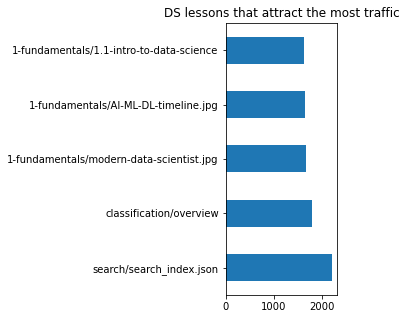

In [13]:
#checking which lessons appears to attract the most traffic in Data Science across cohorts 
ds_df.endpoint.value_counts().head(5).plot.barh(figsize=(2, 5))
plt.title("DS lessons that attract the most traffic")
plt.show()

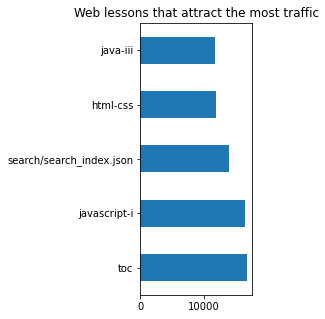

In [14]:
#checking which lessons appears to attract the most traffic in Web Developers across Cohorts 
web_df.endpoint.value_counts().head(5).plot.barh(figsize=(2, 5))
plt.title("Web lessons that attract the most traffic")
plt.show()

## 7. Which lessons are least accessed? 

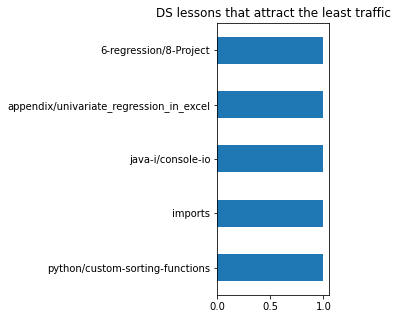

In [15]:
#checking which lessons appears to attract the least traffic in Data Science
ds_df.endpoint.value_counts().tail(5).plot.barh(figsize=(2, 5))
plt.title("DS lessons that attract the least traffic")
plt.show()

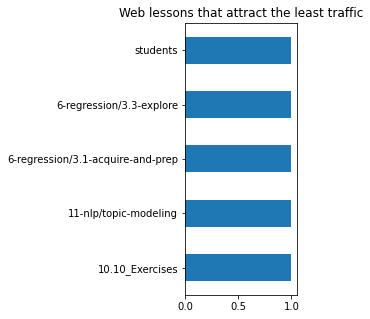

In [16]:
#checking which lessons appears to attract the least traffic in Web Development 
web_df.endpoint.value_counts().tail(5).plot.barh(figsize=(2, 5))
plt.title("Web lessons that attract the least traffic")
plt.show()

## Takeaways:
- Data Science: Lessons with MOST traffic are Classification overview & Fundamentals
- Web Development: Lessons with MOST traffic are Javascript-i & TOC


- Data Science: Lessons with LEAST traffic are python/custom-sorting-functions, imports, java-i/console-io  appendix/univariate_regression_in_excel
- Web Development: Lessons with LEAST traffice are objects/math,12.3.6 Page Styling, Slides/threads

## 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

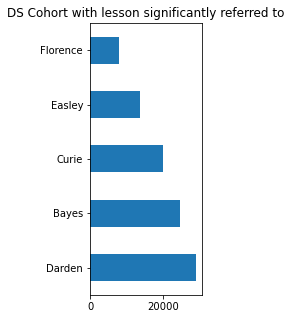

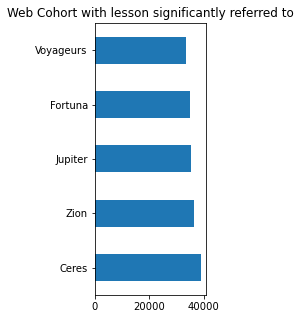

In [17]:
#checking which Cohort in Data Science referred to a lesson significantly more than others  
ds_df.cohort_name.value_counts().head(5).plot.barh(figsize=(2, 5))
plt.title("DS Cohort with lesson significantly referred to")
plt.show()
#checking which Cohort in Web Development referred to a lesson significantly more than others 
web_df.cohort_name.value_counts().head(5).plot.barh(figsize=(2, 5))
plt.title("Web Cohort with lesson significantly referred to")
plt.show()

## Takeaways:
- For Data Science, Darden Cohort has the most lessons that attract traffic 
- For Web Development, Ceres Cohort has the most lessons referred to significantly

## 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [18]:
#grub functions from wrangle.py to run anomalies functions

In [19]:
#let's test functions to find anomalies
span = 30
weight = 3.5

anomalies = pd.DataFrame()

for u in df.user_id.unique():

    one_user = wrangle.find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, one_user])

In [20]:
#look for anomalies
anomalies 

,pages_one_user,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-01-29,44,3.623334,42.081344,-34.834677,1.024945,1
2019-07-08,101,8.248768,96.507472,-80.009936,1.025451,1
2018-10-15,9,0.581421,8.457414,-7.294571,1.034446,3
2019-01-09,4,0.262470,3.802115,-3.277175,1.027953,3
2019-04-06,2,0.129825,1.889712,-1.630061,1.031334,3
...,...,...,...,...,...,...
2021-01-24,7,0.574393,6.857226,-5.708440,1.011362,817
2021-03-25,59,6.824556,58.415342,-44.766230,1.005666,843
2021-02-23,67,8.229409,66.322904,-49.864086,1.005828,851


In [21]:
#get summarized anomalies in asending order
anomalies.sort_values('pages_one_user', ascending=False)

,pages_one_user,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-03-03,272,24.721632,266.780128,-217.336864,1.010782,341
2018-06-02,198,16.484863,188.766965,-155.797239,1.026796,138
2019-12-19,192,19.601776,187.231096,-148.027544,1.014225,526
2020-10-16,179,20.158062,173.720239,-133.404115,1.017191,658
2020-06-05,165,20.035882,163.037501,-122.965736,1.006862,521
...,...,...,...,...,...,...
2019-03-11,1,0.064517,0.939111,-0.810077,1.034810,124
2019-03-20,1,0.064516,0.939061,-0.810029,1.034841,126
2020-11-21,1,0.065202,0.959398,-0.828994,1.022703,410


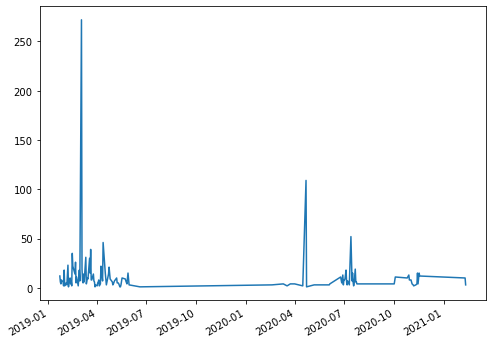

In [24]:
#let's plot to see the activities with most views at pages 272
df[df.user_id==341].index.value_counts().plot(figsize=(8,6))
plt.show()

## Takeaway:
### Looks like user_id  number 341 has the most views at 272 pages in a single day but nothing suspicious. 

## 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [ ]:
#let's make a new dataframe for DS grads
grad_ds_df = ds_df[ds_df.index>ds_df.end_date]

In [ ]:
#check the head
grad_ds_df.head()

In [ ]:
#let's check the endpoint counts
grad_ds_df.endpoint.value_counts()

## Takeaway:
### For Data Science the most common topics for graduates to reference are sql/mysql-overview and classification/overview

In [ ]:
#let's make a new dataframe for Web Dev grads
grad_web_df = web_df[web_df.index>web_df.end_date]

In [ ]:
#check the head
grad_web_df.head()

In [ ]:
#let's check the endpoint counts
grad_web_df.endpoint.value_counts()

## Takeaway:
### For Web Development the most common topics for graduates to reference are Javascript-i and Spring